In [57]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
from IPython.display import display
import matplotlib.pyplot as plt

In [58]:
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)


reg = LinearRegression().fit(X, y)
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
X_binned = kb.transform(X)
X_binned.toarray()[:10]

kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)


## 4.5 상호작용과 다항식

특성을 풍부하게 나타내는 다른 방법은 원본 데이터에 상호작용과 다항식을 추가하는 것이다. 이런 종류는 보통 통계적 모델링에서 주로 사용한다. 

아래에서 선형 모델은 wave 데이터셋의 각 구간에 대해 상숫값을 학습 했다. 절편 외에 기울기도 학습할 수 있기에, 구간으로 분할된 데이터에 원래 특성을 다시 추가하면 된다.

In [59]:
X_combined = np.hstack([X, X_binned])
print(X.shape)
print(X_combined.shape)

(120, 1)
(120, 11)


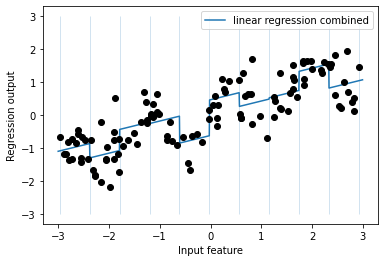

In [60]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

이 모델은 각 구간의 절편과 기울기를 학습했다. 하지만 x축의 특성이 하나이므로 각 구간에서의 기울기도 하나이다. 각 구간에서 다른 기울기를 가지는게 유익할 것 같으니 데이터 포인트가 있는 구간과 x축 사이의 상호작용 특성을 추가하자.

이 특성은 구간 특성과 원본 특성의 곱이다.


In [61]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


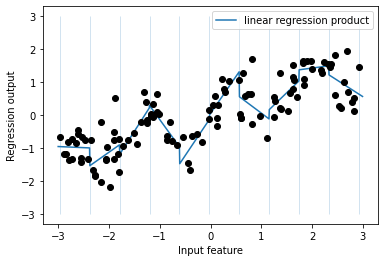

In [62]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

구간 나누기는 연속형 특성을 확장하는 방법 중 하나이다. 원본 특성의 다항식을 추가하는 방법이 있다. x^2, x^3 등이 예시이다.

위와 같은 방법들은 preprocessing 모듈의 PolynomicalFeatures에 구현되어 있다.

In [63]:
from sklearn.preprocessing import PolynomialFeatures

# x ** 10 까지 고차항을 추가한다.
# 기본값인 "include_bias=True"는 절편에 해당하는 1인 특성을 추가한다.
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)


10차원을 사용했으니 10개의 특성이 만들어진다.

In [64]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (120, 10)


X와 X_poly의 값을 비교해보겠다.

In [65]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


각 특성의 차수를 알려주는 get_feature_names 메서드를 사용해 특성의 의미를 알 수 있다.

In [66]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


각 열들이 거듭제곱 꼴로 나오는 것을 볼 수 있다.

다항식 특성을 선형 모델과 함께 사용하면 전형적인 다항 회귀 모델이 된다.

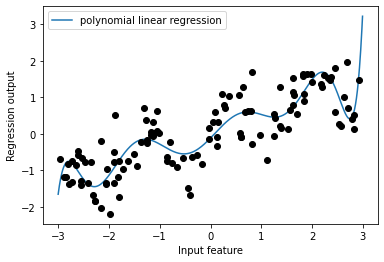

In [67]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

다항식 특성은 1차원 데이터셋에서도 매우 부드러운 곡선의 형태이다. 하지만 고차원 다항식은 데이터가 부족한 영역에서 너무 민감하게 반응한다. 

비교를 위해 아무런 변환도 거치지 않은 원본 데이터에 커널 SVM 모델을 학습 시켜보자.

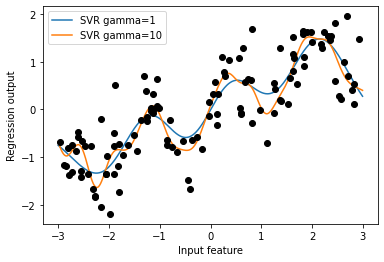

In [68]:
from sklearn.svm import SVR #SVM 회귀

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

더 복잡한 모델인 커널 SVM을 사용해 특성 데이터를 변환핮 ㅣ않고 다항 회귀와 비슷한 복잡도를 가진 예측을 만들었다.

더 현실적으로 진행해보자.

In [69]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)

# MinMaxScaler를 이용해 0~1 사이로 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# degree로 특성 곱에 들어갈 특성의 개수를 조정
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


절편(1)+원본(13)+두 개 조합(91)=105

In [71]:
# get_feature_names 메서드로 특성의 관계 확인
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


상호작용 특성이 있는 데이터, 없는 데이터에 대해 Ridge를 사용한 성능 비교를 해보자.

In [72]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


상호작용과 다항식 특성이 Ridge의 성능을 높였다.

그러나 랜덤 포레스트 같이 더 복잡한 모델을 사용해 보자.

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.794
Score with interactions: 0.769


랜덤 포레스트에선 오히려 상호작용과 다항식을 추가하면 성능이 준다.

## 4.6 일변량 비선형 변환

트리 기반 모델은 특성의 순서에만 영향을 받지만 선형 모델과 신경망은 각 특성의 스케일과 분포에 밀접하다. 그리고 특성과 타깃값 사이에 비선형성이 있다면 특히 선형 회귀에서는 모델을 만들기가 어렵다. log와 exp 함수는 데이터의 스케일을 변경해 선형 모델과 신경망의 성능을 올리는 데 도움을 준다. sin과 cos 함수는 주기적인 패턴이 들어 있는 데이터를 다룰 때 편리하다.

대부분각 특성이 정규분포와 비슷할 때 최고의 성능을 낸다. 수학 함수를 적용하는 것은 편법이지만 쉽고 효과적인 방법이다.전형적인 예시로는 정수 카운터 데이터를 다룰 때이며 아래에서 실제 데이터의 속성과 비슷한 카운트 데이터를 만들어 사용해보겠다.

In [74]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [75]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

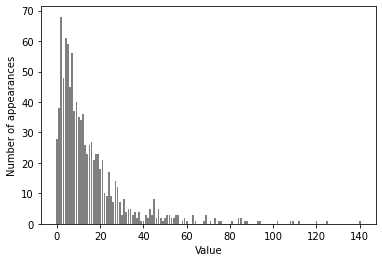

In [76]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

Text(0.5, 0, 'Value')

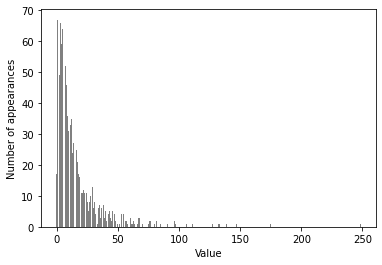

In [77]:
bins = np.bincount(X[:, 1])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

Text(0.5, 0, 'Value')

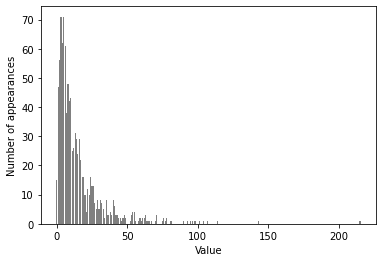

In [78]:
bins = np.bincount(X[:, 2])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

각각의 특성들의 분포는 작은 수치가 많고 큰 수치는 적다는 점에서 비슷하다. 선형 모델은 이런 데이터를 잘 처리하지 못한다. 여기에 리지 회귀를 적용해보자

In [79]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


점수가 낮은걸로 보아 제대로 모델링하지 못했다.

로그 스케일을 적용하는 것을 해볼 것인데 데이터에 0 값이 있으면 log 함수를 적용할 수 없으므로 X+1을 사용하자

Text(0.5, 0, 'Value')

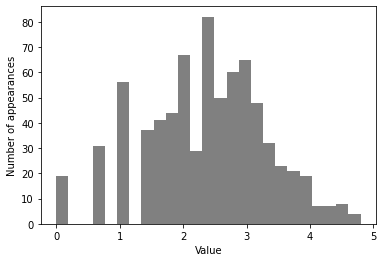

In [80]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

데이터의 분포가 덜 치우쳐있다. 이 데이터에 리지 모델을 만들면 더 좋은 결과가 나온다.

In [81]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


데이터셋과 모델의 조합에 최적인 변환 방법을 찾기란 예술에 가까운 일이며 일부 특성, 타깃 변수 등을 변환하는 방법들 또한 존재한다. 데이터와 모델간의 최적점은 가지각색이다 정도로 넘어가면 될 듯 하다.

## 4.7 특성 자동 선택

더 간단한 모델과더 좋은 일반화 성능을 위하여 특성을 적절히 조정해야한다.

이를 위한 전략으로 일변량통계, 모델 기반 선택, 반복적 선택이 있다.

모두 지도 학습 방법이므로 타깃값이 필요하며 훈련 세트와 테스트 세트로 나눈 다음 훈련 데이터만 특성 선택에 사용해야 한다.

### 4.7.1 일변량 통계

기본적으로 개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지 계산하고 깊게 관련되어 있다고 판단되는 특성을 선택하는 것이다. 

각 특성은 독립적을 평가되기에 다른 특성과 깊게 연관된 특성은 선택되지 않는다. 계산이 매우 빠르며 평가를 위해 모델을 만들 필요가 없다.

사이킷런에서 일변량 분석으로 특성을 선택하는 방법.

분류: f_classif(기본값)을 선택 후 테스트-> 계산한 p값들 중 매우 높은 값을 가진 특성을 제외함

회귀: f_regression을 선택 후 테스트-> 그 후 동일

제외할 수 있는 임계값을 매개변수를 통해 조정한다.

임계값을 계산하는 방법

SelectKBest: 고정된 k개의 특성 선택

SelectPercentile: 지정된 비율만큼 특성 선택

아래에선 cancer 데이터셋에 분류를 위한 특성 선택을 적용하겠다. 

In [82]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수를 발생시킵니다.
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 데이터에 노이즈 특성을 추가합니다.
# 처음 30개는 원본 특성이고 다음 50개는 노이즈입니다.
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택합니다.
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# 훈련 세트에 적용합니다.
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


특성 개수가 80 -> 40 로 줄었다. get_support 메서드는 선택된 특성을 불리언 값으로 표시해주어 어떤 특성이 선택되었는지 확인 할 수 있다.

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], [])

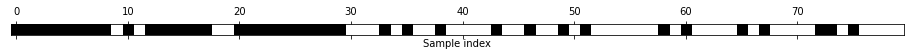

In [83]:
mask = select.get_support()
print(mask)
# True는 검은색, False는 흰색으로 마스킹한다.
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

대부분 원본 특성이고 노이즈 특성이 거의 제거되었다. 전체 특성, 선택된 특성을 사용했을 때의 로지스틱 회귀의 성능을 비교하겠다.

In [84]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

AttributeError: 'str' object has no attribute 'decode'

Score with all features: 0.930

Score with only selected features: 0.940

일부 원본 특성이 없어도 특성을 선택한 쪽의 성능이 더 높다.

항상 이렇진 않으니 적절히 사용해야 한다.

너무 많은 특성이 존재하거나 도움이 안된다고 생각될 때 일변량 분석을 사용하여 특성을 선택하면 좋을 것이다.